In [10]:
import matplotlib.pyplot as plt
import numpy as np
from strand_error_sim import StrandErrorSimulation
import csv


In [11]:
example_strand = "TTGTCACTAGAGGACGCACGCTCTATTTTTATGATCCATTGATGTCCCTGACGCTGCAAAATTTGCAACCAGGCAGTCTTCGCGGTAGGTCCTAGCCTTAAGCTAGCTAG"
# len = 110

In [12]:
total_error_rates = {
    'd': 0.015163160437436866,
    'i': 0.018348000570951734,
    's': 0.01700159756686723,
    'ld': 0.0033104220650884975,
}

base_error_rates = {
    'A': {
        'pi': 0.01588836102870499,
        'i': 0.01621475841752588,
        's': 0.015851018954560227,
        'd': 0.011764136395383413,
        'ld': 0.003110456472280425,
    },
    'G': {
        'pi': 0.023879556701749495,
        'i': 0.018091587091377988,
        's': 0.016569317627378545,
        'd': 0.017090680978601797,
        'ld': 0.003931135429009549
    },
    'C': {
        'pi': 0.017915924372554178,
        'i': 0.01887005911546257,
        's': 0.01853747500507736,
        'd': 0.01712126643667476,
        'ld': 0.0033067584089939467
    },
    'T': {
        'pi': 0.01581873288059774,
        'i': 0.020162401335515973,
        's': 0.017022155950663705,
        'd': 0.014674738110288119,
        'ld': 0.002907934758532013,
    }
}

long_deletion_length_rates = {2: 84,
                            3: 13,
                            4: 1.8,
                            5: 0.2,
                            6: 0.02}

In [13]:
# full copy error types and locations test:

full_strand_copy_sim_f = open('full_strand_copy_simulation', 'w')
full_copy_err_type_f = open('full_copy_error_types', 'w')
full_copy_error_loc_f = open('full_copy_error_locations', 'w')

frame_f = open('frames.csv', 'w')
writer = csv.writer(frame_f)
writer.writerow(['Refs', 'Sims'])
for _ in range(1000):
    simulator = StrandErrorSimulation(total_error_rates, base_error_rates, long_deletion_length_rates,
                                example_strand)
    og_index = 0
    while simulator.index < len(simulator.strand):
        simulator.simulate_error_on_base()
        type_result_to_write = str(simulator.err_type) + '\n'
        full_copy_err_type_f.write(type_result_to_write)
        if simulator.err_type != 'n':
            location_result_to_write = str(og_index) + '\n'
            full_copy_error_loc_f.write(location_result_to_write)
        output_strand_to_write = str(simulator.strand) + '\n'
        full_strand_copy_sim_f.write(output_strand_to_write)
        simulator.index += 1
        og_index += 1

    full_strand_copy_sim_f.write(simulator.strand + '\n')
    writer.writerow([example_strand, simulator.strand])

full_copy_err_type_f.close()
full_copy_error_loc_f.close()
full_strand_copy_sim_f.close()


In [14]:
# analyze error types:

full_copy_err_type_f = open('full_copy_error_types', 'r')
hist = [['d', 0], ['ld', 0], ['s', 0], ['pi', 0], ['n', 0]]
lines = full_copy_err_type_f.readlines()
for line in lines:
    if line == 'd\n':
        hist[0][1] += 1
    if line == 'ld\n':
        hist[1][1] += 1
    if line == 's\n':
        hist[2][1] += 1
    if line == 'pi\n':
        hist[3][1] += 1
    if line == 'n\n':
        hist[4][1] += 1
full_copy_err_type_f.close()

print('d appearance rate: ' + str(hist[0][1] / (1000 * len(example_strand))))
print('ld appearance rate: ' + str(hist[1][1] / (1000 * len(example_strand))))
print('s appearance rate: ' + str(hist[2][1] / (1000 * len(example_strand))))
print('pi appearance rate: ' + str(hist[3][1] / (1000 * len(example_strand))))
print('n appearance rate: ' + str(hist[4][1] / (1000 * len(example_strand))))

d appearance rate: 0.017027272727272728
ld appearance rate: 0.0032636363636363635
s appearance rate: 0.017781818181818183
pi appearance rate: 0.01959090909090909
n appearance rate: 0.9385454545454546


In [15]:

# Read file containing error locations
error_loc_f = open('full_copy_error_locations', 'r')
lines = error_loc_f.readlines()
error_loc_f.close()

hist = [int(line.rstrip()) for line in lines]


In [16]:
nums, counts = np.unique(hist, return_counts=True, axis=0)

print(nums)
print(counts)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
[114  88 105  66  54  64  70  60  52  52  49  51  60  52  51  44  55  64
  44  47  63  62  38  67  50  47  59  43  56  57  54  56  45  40  54  51
  50  45  49  51  58  65  47  50  51  50  55  46  49  55  49  51  57  59
  49  56  57  62  45  53  60  54  67  57  46  53  66  65  48  41  48  48
  47  70  45  67  61  58  50  68  54  49  59  58  53  43  65  54  51  36
  49  49  32  52  49  57  62  51  64  50  45  47  48  53  51  39  57  99
 117 288]


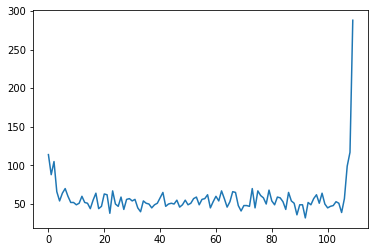

In [17]:
plt.plot(nums, counts)

In [18]:
# import numpy as np
# import matplotlib.pyplot as plt

# skew = sorted(np.random.triangular(0, 0.15, 0.3, 2000))
# mid = 55

# vals = [0] * 111
# for i in range(0, 111):
#     pos = int((len(skew) - 1) * abs(i - mid) / mid)
#     # pos = -1 * int(len(skew) * abs(i - mid) / mid)
#     # if i == 55:
#     #     pos = -1
#     vals[i] = skew[pos]

# plt.plot(range(0, 111), vals)